In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime

In [2]:
style.use('fivethirtyeight')
sns.set_context('talk')

In [3]:
#https://covid19.healthdata.org/api/data/hospitalization?location=536
#https://covid19.healthdata.org/api/data/intervention?location=536
#https://covid19.healthdata.org/api/data/bed?location=536

In [4]:
raw_json = json.loads(requests.get('https://covid19.healthdata.org/api/data/hospitalization?location=536').text)
df = pd.DataFrame(raw_json).drop(['dt_mean','dt_upper','dt_lower'], axis=1)

output_path = f"../data/projections/hospitalization_{datetime.date.today().strftime('%Y%m%d')}.csv"
df.to_csv(output_path, index=False)

In [5]:
df.covid_measure_name.unique()

array(['deaths', 'total_death', 'covid_all_bed', 'covid_ICU_bed',
       'invasive_ventilation', 'bedover', 'icuover',
       'peak_resource_usage'], dtype=object)

In [6]:
max_deaths_date, max_deaths_value = df.query("covid_measure_name == 'deaths'").query("mean == mean.max()")[['date_reported','mean']].values[0]

In [7]:
max_deaths_date#, #max_deaths_value

'2020-04-12 00:00:00'

In [8]:
df.query("covid_measure_name == 'total_death'")['mean'].max()

1588

In [9]:
#hospitalization = json.loads(response.text)

#hospitalization_df = pd.DataFrame(hospitalization).drop(['dt_mean','dt_upper','dt_lower'], axis=1)
df['date_reported'] = pd.to_datetime(df['date_reported'])

In [10]:
#hospitalization_df.query('covid_measure_name == "total_death"')

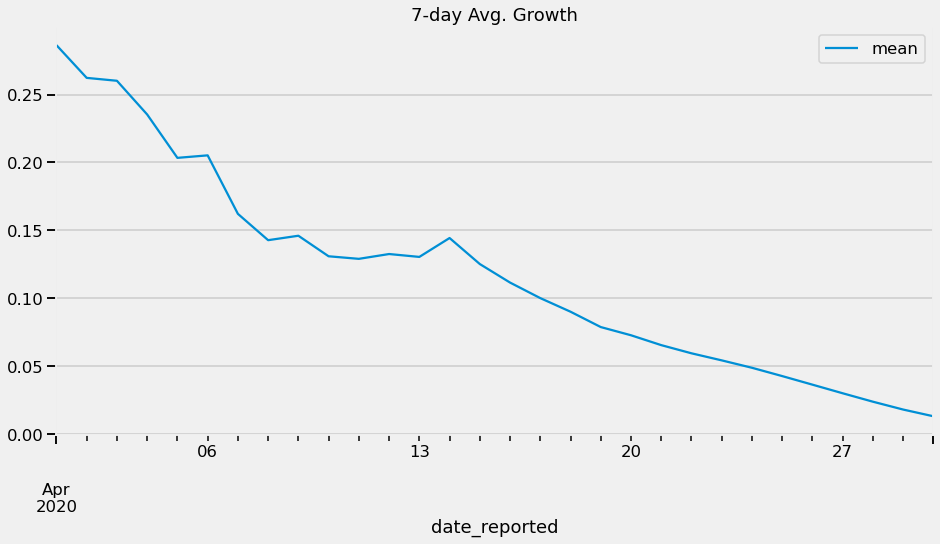

In [11]:
growth = df.query("covid_measure_name == 'total_death'")\
.drop(['upper','lower','covid_measure_name','location_id','data_type_name'],axis=1).set_index('date_reported')

shift=7

fig, ax = plt.subplots(figsize=(14, 7))

growth = (np.log(growth / growth.shift(shift)) / shift)

growth.loc[(growth.index >= '2020-04-01')&(growth.index < '2020-05-01')].plot(title='7-day Avg. Growth', ax=ax);

#(np.log(deaths['mean'] / deaths['mean'].shift(shift)) / shift).plot( title='7-day Avg. Growth')


#growth = all_cases.set_index('ds')
#growth = (np.log(growth / growth.shift(shift)) / shift).tail(20)
#growth.plot(ax=axs[0], title=f'{shift}-day Average Growth');


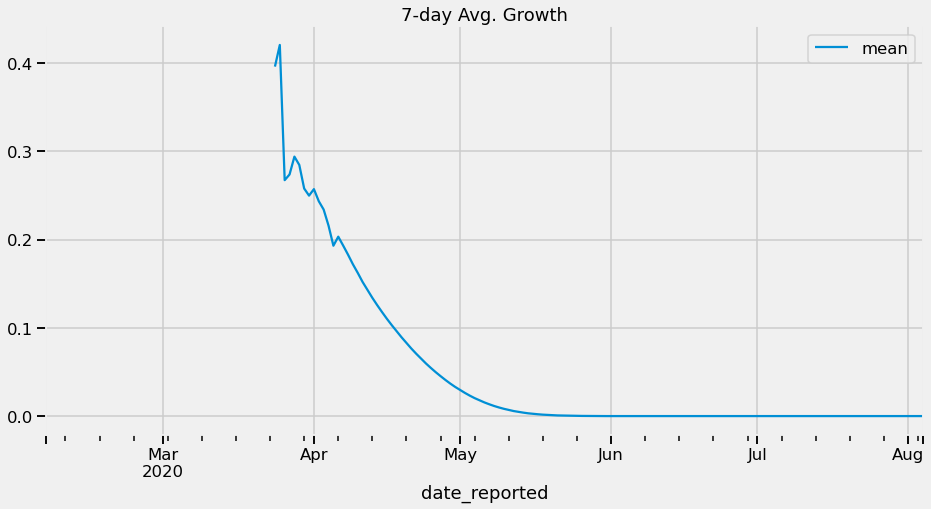

In [63]:
growth = hospitalization_df.query("covid_measure_name == 'total_death'")\
.drop(['upper','lower','covid_measure_name','location_id','data_type_name'],axis=1).set_index('date_reported')

shift=7

fig, ax = plt.subplots(figsize=(14, 7))

(np.log(growth / growth.shift(shift)) / shift).plot(title='7-day Avg. Growth', ax=ax);
#(np.log(deaths['mean'] / deaths['mean'].shift(shift)) / shift).plot( title='7-day Avg. Growth')


#growth = all_cases.set_index('ds')
#growth = (np.log(growth / growth.shift(shift)) / shift).tail(20)
#growth.plot(ax=axs[0], title=f'{shift}-day Average Growth');


In [17]:
#hospitalization_df.covid_measure_name.unique()

In [21]:
hospitalization_df.query("date_reported == '2020-04-01'")

,date_reported,data_type_name,location_id,mean,upper,lower,covid_measure_name
163,2020-04-01,projected,536,3355,4120,2698,covid_all_bed
344,2020-04-01,projected,536,676,860,524,covid_ICU_bed
525,2020-04-01,projected,536,540,685,418,invasive_ventilation
652,2020-04-01,projected,536,23,25,21,deaths
779,2020-04-01,projected,536,115,118,112,total_death
960,2020-04-01,projected,536,0,0,0,bedover
1141,2020-04-01,projected,536,0,0,0,icuover


In [22]:
hospitalization_df.query("date_reported == '2020-03-31'")

,date_reported,data_type_name,location_id,mean,upper,lower,covid_measure_name
162,2020-03-31,projected,536,2936,3521,2436,covid_all_bed
343,2020-03-31,projected,536,599,737,480,covid_ICU_bed
524,2020-03-31,projected,536,479,588,385,invasive_ventilation
651,2020-03-31,projected,536,19,20,18,deaths
778,2020-03-31,projected,536,92,93,91,total_death
959,2020-03-31,projected,536,0,0,0,bedover
1140,2020-03-31,projected,536,0,0,0,icuover


In [23]:
hospitalization_df.date_reported.max()

Timestamp('2020-08-04 00:00:00')

In [25]:
hospitalization_df.query(f"date_reported == '{hospitalization_df.date_reported.max()}'")

,date_reported,data_type_name,location_id,mean,upper,lower,covid_measure_name
288,2020-08-04,projected,536,0,0,0,covid_all_bed
469,2020-08-04,projected,536,0,0,0,covid_ICU_bed
650,2020-08-04,projected,536,0,0,0,invasive_ventilation
777,2020-08-04,projected,536,0,0,0,deaths
904,2020-08-04,projected,536,2326,4696,969,total_death
1085,2020-08-04,projected,536,0,0,0,bedover
1266,2020-08-04,projected,536,0,0,0,icuover
